In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:

#1. Loading files 
transaction= pd.read_excel('KPMG_VI_New_raw_data_update_finalV2.xlsx', sheet_name='Transactions (2)' )
newcustomer=pd.read_excel('KPMG_VI_New_raw_data_update_finalV2.xlsx', sheet_name='NewCustomerList (2)' )
demography=pd.read_excel('KPMG_VI_New_raw_data_update_finalV2.xlsx', sheet_name='CustomerDemographic')
add=pd.read_excel('KPMG_VI_New_raw_data_update_finalV2.xlsx', sheet_name='CustomerAddress')



In [3]:
transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit_rate,product_first_sold_date
0,14675,72,2202,2017-01-02,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,0.250000,2016-12-06
1,6800,0,1427,2017-01-03,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,0.250000,2016-12-06
2,15602,0,2027,2017-01-03,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,0.250000,2016-12-06
3,17998,0,2039,2017-01-08,0.0,Approved,Trek Bicycles,Standard,high,medium,495.72,297.43,0.400004,2016-12-06
4,9772,72,1301,2017-01-09,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,0.250000,2016-12-06


In [4]:
newcustomer.tail()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,Date,Age
995,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,10,0.75,0.750,0.9375,0.796875,9,997,0.357000,2019-11-30,18.0
996,Tomkin,Bernlin,Male,7,2001-12-29,Food Chemist,Health,Affluent Customer,N,Yes,...,3,0.72,0.900,0.9000,0.900000,4,475,0.881875,2019-11-30,17.0
997,Simmonds,Bapty,Male,52,2002-01-04,Junior Executive,Financial Services,Affluent Customer,N,No,...,12,0.89,0.890,1.1125,1.112500,5,760,0.637500,2019-11-30,17.0
998,Lura,Fawdrie,Female,66,2002-01-17,VP Sales,Health,Mass Customer,N,Yes,...,3,1.08,1.350,1.3500,1.147500,2,396,0.937500,2019-11-30,17.0
999,Giulietta,Garbott,Female,59,2002-02-27,Technical Writer,NaN,Affluent Customer,N,Yes,...,5,0.78,0.975,0.9750,0.975000,1,355,0.984375,2019-11-30,17.0


In [5]:
demography.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
Date                                     0
Age                                     87
dtype: int64

In [6]:
transaction.head()
transaction.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,profit_rate
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,0.446065
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,0.264221
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,0.072214
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,0.249973
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,0.399998
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,0.676080
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,0.989604


In [7]:
demography.head()
demography.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,Age
count,4000.000000,4000.000000,3913.000000,3913.000000
mean,2000.500000,48.890000,10.657041,41.880910
std,1154.844867,28.715005,5.660146,12.623222
min,1.000000,0.000000,1.000000,17.000000
25%,1000.750000,24.000000,6.000000,32.000000
50%,2000.500000,48.000000,11.000000,42.000000
75%,3000.250000,73.000000,15.000000,51.000000
max,4000.000000,99.000000,22.000000,88.000000


In [8]:
add.head()
add.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [9]:
#Step1. Understand your data 

In [10]:
#1.1 Basic info 

print("No. unique customer id-Add", len(set(add.customer_id)))
print("No. unique customer id-Demography", len(set(demography.customer_id)))
print("No. unique customer id-Transaction",len(set(transaction.customer_id)))

No. unique customer id-Add 3999
No. unique customer id-Demography 4000
No. unique customer id-Transaction 3494


In [11]:
#1.2 The percentage of missing values for each column
print(transaction.isnull().sum()/len(transaction))
print(newcustomer.isnull().sum()/len(newcustomer))
print(demography.isnull().sum()/len(demography))
print(add.isnull().sum()/len(add))

transaction_id             0.00000
product_id                 0.00000
customer_id                0.00000
transaction_date           0.00000
online_order               0.01800
order_status               0.00000
brand                      0.00985
product_line               0.00985
product_class              0.00985
product_size               0.00985
list_price                 0.00000
standard_cost              0.00985
profit_rate                0.00985
product_first_sold_date    0.00985
dtype: float64
first_name                             0.000
last_name                              0.029
gender                                 0.000
past_3_years_bike_related_purchases    0.000
DOB                                    0.017
job_title                              0.106
job_industry_category                  0.165
wealth_segment                         0.000
deceased_indicator                     0.000
owns_car                               0.000
tenure                                 0.000


In [12]:
#1.3 The number of missinge values 

print(transaction.isnull().sum())
print(newcustomer.isnull().sum())
print(demography.isnull().sum())
print(add.isnull().sum())

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
profit_rate                197
product_first_sold_date    197
dtype: int64
first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                             

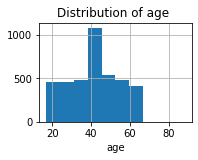

([0, 1, 2], <a list of 3 Text xticklabel objects>)

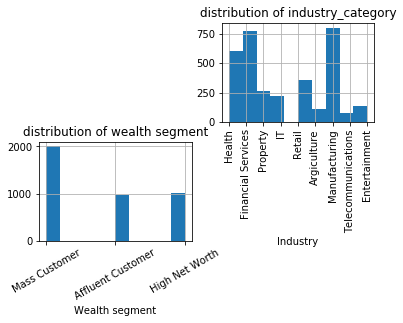

In [13]:
#Step2. Data ingestion 

"""
    Level 1 - merge customer's info together ( customers address + customer dempgraphy = Merge_data 1)
    Level 2 - clean  Merge_data 1
              -> Get the clean Merge_data 1
    Level 3 - merge  Merge_data 1 with transaction ion ( Merge_data 1+ transaction = merge_transaction)
    Level 4 - clean merge_transaction
    Level 5 - drop irrelevant column and mapping values 
    
"""
#2.1 Cleaning data fill out the missing values 

#Determine the missing values strategy 
"""
 Merge add+demography:
   -drop the missing values if the missing values % less than 0.01
   -age-> average
   -job title -> will not be included in the model analysis
   -job industry -> fill the most poplar industry in the state 
       QLC- Construction (https://itt.abs.gov.au/itt/r.jsp?RegionSummary&region=3&dataset=ABS_REGIONAL_ASGS2016&geoconcept=ASGS_2016&measure=MEASURE&datasetASGS=ABS_REGIONAL_ASGS2016&datasetLGA=ABS_REGIONAL_LGA2018&regionLGA=LGA_2018&regionASGS=ASGS_2016)
       NSW- Construction
       VIC- Construction
   -tenure -> median 

"""


#2.2 merger data add+demo for customer' info mation 

merge_1= pd.merge(demography,add, how='outer', on='customer_id', indicator= True).sort_values(by='customer_id') #Outer merge add+dem


#2.3 plot the graph to demonstrate the demography

plt.subplot(2, 2, 1)

    #Histogram for age
merge_1['Age'].hist()

    # labels and display
plt.title("Distribution of age ")
plt.xlabel("age")
plt.show()



    # his industry & wealth segment 

plt.subplot(2, 2, 2)
merge_1['job_industry_category'].hist()
plt.title('distribution of industry_category')
plt.xlabel('Industry')
plt.xticks(rotation=90)


plt.subplot(2, 2, 3)
merge_1['wealth_segment'].hist()
plt.title('distribution of wealth segment')
plt.xlabel('Wealth segment')
plt.xticks(rotation=30)


 

In [14]:
print(merge_1.isnull().sum()/len(merge_1))

customer_id                            0.000000
first_name                             0.000749
last_name                              0.031976
gender                                 0.000749
past_3_years_bike_related_purchases    0.000749
DOB                                    0.022483
job_title                              0.127155
job_industry_category                  0.164627
wealth_segment                         0.000749
deceased_indicator                     0.000749
default                                0.076193
owns_car                               0.000749
tenure                                 0.022483
Date                                   0.000749
Age                                    0.022483
address                                0.000999
postcode                               0.000999
state                                  0.000999
country                                0.000999
property_valuation                     0.000999
_merge                                 0

In [15]:
print(merge_1.isnull().sum()/len(merge_1))

customer_id                            0.000000
first_name                             0.000749
last_name                              0.031976
gender                                 0.000749
past_3_years_bike_related_purchases    0.000749
DOB                                    0.022483
job_title                              0.127155
job_industry_category                  0.164627
wealth_segment                         0.000749
deceased_indicator                     0.000749
default                                0.076193
owns_car                               0.000749
tenure                                 0.022483
Date                                   0.000749
Age                                    0.022483
address                                0.000999
postcode                               0.000999
state                                  0.000999
country                                0.000999
property_valuation                     0.000999
_merge                                 0

In [16]:
#2.5 clean Missing values - df 1 

# 2.5.1 Fill missing values 

fill_age_value=merge_1['Age'].mean()
fill_industry_value='Construction'
fill_tenure=merge_1['tenure'].median()

merge_1['Age']=merge_1.Age.fillna(fill_age_value).round(0)
merge_1['job_industry_category']=merge_1.job_industry_category.fillna(fill_industry_value)
merge_1['tenure']=merge_1.tenure.fillna(fill_tenure).round(0)


# 2.5.2Drop irrelevant columns- First name, lase name, DOB, job title, 

merge_1=merge_1.drop(columns=["default","DOB","first_name","last_name","job_title"])


In [17]:


#Change categorical value to numeric values 
#Change gender male/female to 1 / 0

female_list=['F', 'Femal', 'Female']

for i in female_list:
    merge_1.loc[merge_1['gender'] == i , 'gender' ] = 0

male_list=['U', 'M', 'Male']
    
for i in male_list:
    merge_1.loc[merge_1['gender'] == i , 'gender'] =1



#2.6Change region "QLC, NSW, VIC" to 1, 2, 3



In [18]:
#To see the values in the column
set(merge_1['state'])

{'NSW', 'New South Wales', 'QLD', 'VIC', 'Victoria', nan}

In [19]:
merge_1.isnull().any()

customer_id                            False
gender                                  True
past_3_years_bike_related_purchases     True
job_industry_category                  False
wealth_segment                          True
deceased_indicator                      True
owns_car                                True
tenure                                 False
Date                                    True
Age                                    False
address                                 True
postcode                                True
state                                   True
country                                 True
property_valuation                      True
_merge                                 False
dtype: bool

In [20]:
for i in list(range(0,len(merge_1['state']))):
    if merge_1['state'][i] == 'NSW' or merge_1['state'][i] == 'New South Wales':
        merge_1['state'][i] = 1
    elif merge_1['state'][i] == 'VIC' or merge_1['state'][i] == 'Victoria':
        merge_1['state'][i] = 3
    elif merge_1['state'][i] == 'QLD':
        merge_1['state'][i] = 2
        

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
merge_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4003 entries, 69 to 4002
Data columns (total 16 columns):
customer_id                            4003 non-null int64
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null float64
job_industry_category                  4003 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
owns_car                               4000 non-null object
tenure                                 4003 non-null float64
Date                                   4000 non-null datetime64[ns]
Age                                    4003 non-null float64
address                                3999 non-null object
postcode                               3999 non-null float64
state                                  3999 non-null object
country                                3999 non-null object
property_valuation                     39

In [22]:
#re index data frame

merge_1.reindex()



,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Date,Age,address,postcode,state,country,property_valuation,_merge
69,1,0,93.0,Health,Mass Customer,N,Yes,11.0,2019-11-30,66.0,060 Morning Avenue,2016.0,1,Australia,10.0,both
2581,2,1,81.0,Financial Services,Mass Customer,N,Yes,16.0,2019-11-30,38.0,6 Meadow Vale Court,2153.0,1,Australia,10.0,both
87,3,1,61.0,Property,Mass Customer,N,Yes,15.0,2019-11-30,65.0,NaN,NaN,NaN,NaN,NaN,left_only
544,4,1,33.0,IT,Mass Customer,N,No,7.0,2019-11-30,58.0,0 Holy Cross Court,4211.0,2,Australia,9.0,both
1910,5,0,56.0,Construction,Affluent Customer,N,Yes,8.0,2019-11-30,42.0,17979 Del Mar Point,2448.0,1,Australia,4.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,3999,1,11.0,Manufacturing,Affluent Customer,N,Yes,10.0,2019-11-30,46.0,1482 Hauk Trail,3064.0,3,Australia,3.0,both
3308,4000,1,76.0,Construction,Affluent Customer,N,No,11.0,2019-11-30,28.0,57042 Village Green Point,4511.0,2,Australia,6.0,both
4000,4001,NaN,NaN,Construction,NaN,NaN,NaN,11.0,NaT,42.0,87 Crescent Oaks Alley,2756.0,1,Australia,10.0,right_only
4001,4002,NaN,NaN,Construction,NaN,NaN,NaN,11.0,NaT,42.0,8194 Lien Street,4032.0,2,Australia,7.0,right_only


In [23]:
#2.7 Group-Age 


"""
Age: 

age =<20       Gen Z
21=< age =< 35  Gen Y  
36=< age =< 50  Gen X
51=< age =< 65  Baby Boomers
age >= 65      Traditionalists


"""


#Change to group name 

merge_1['Age_group']=merge_1['Age']

for i in range(0,len(merge_1['Age'])):
    if merge_1['Age'][i] <= 20:
        merge_1['Age_group'][i]='Gen Z'
    elif merge_1['Age'][i] >= 21 and merge_1['Age'][i] <= 35:
        merge_1['Age_group'][i]='Gen Y'
    elif merge_1['Age'][i] >= 36 and merge_1['Age'][i] <= 50:
        merge_1['Age_group'][i]='Gen X'
    elif merge_1['Age'][i] >= 51 and merge_1['Age'][i] <= 65:
        merge_1['Age_group'][i]='Baby Boomers'
    elif merge_1['Age'][i] > 65:
        merge_1['Age_group'][i]='Silent Generation'



//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29

In [24]:
# 2.8 drop missing values

merge_1=merge_1.dropna().round(2)

In [25]:
#2.9 Merge the clean customer info(merge_1) with transaction sheet 

In [26]:
#2.9.1Merge datastes- Demo+add+Transaction


merge_transaction= pd.merge(transaction, merge_1, on='customer_id', how='left' ) #Left merge 

print(merge_transaction.isnull().sum())
print(merge_transaction.isnull().sum()/len(transaction))

#2.9.2 determine missing values straegy

"""

1.drop values if the percentage of missing values is less than 1%
2. Fill missing values:
    online order: random fill in True/False 

"""

transaction_id                           0
product_id                               0
customer_id                              0
transaction_date                         0
online_order                           360
order_status                             0
brand                                  197
product_line                           197
product_class                          197
product_size                           197
list_price                               0
standard_cost                          197
profit_rate                            197
product_first_sold_date                197
gender                                  32
past_3_years_bike_related_purchases     32
job_industry_category                   32
wealth_segment                          32
deceased_indicator                      32
owns_car                                32
tenure                                  32
Date                                    32
Age                                     32
address    

'\n\n1.drop values if the percentage of missing values is less than 1%\n2. Fill missing values:\n    online order: random fill in True/False \n\n'

In [27]:
#2.9.3 fill the missing values 

In [28]:
#Randomly generate 0 or 1 
fill_online_value=random.randint(0,1)
merge_transaction['online_order']=merge_transaction.online_order.fillna(fill_online_value).round(0)

In [29]:
#2.9.4 Group Profit-> Create profit level


"""

< 10 % -> Low 
10% < x < 24% -> Mid-lower  
24%<  x < 40% -> Mid
40%< x < 60% -> upper-mid
>60% -> High

"""

merge_transaction['Profit_level']=merge_transaction['profit_rate']


for i in list(range(0,len(merge_transaction))):
    if merge_transaction['profit_rate'][i] <= 0.1:
        merge_transaction['Profit_level'][i] = 'low'
    elif merge_transaction['profit_rate'][i] >0.1 and merge_transaction['profit_rate'][i] <= 0.24:
        merge_transaction['Profit_level'][i] =  'mid-low'
    elif merge_transaction['profit_rate'][i] > 0.24 and merge_transaction['profit_rate'][i] <= 0.4:
        merge_transaction['Profit_level'][i]='mid'
    elif merge_transaction['profit_rate'][i] > 0.4 and merge_transaction['profit_rate'][i] <= 0.6:
        merge_transaction['Profit_level'][i]='upper-mid'
    elif merge_transaction['profit_rate'][i] > 0.6:
        merge_transaction['Profit_level'][i] = 'high'

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to 

In [30]:
#2.9.5 drop missing values
merge_transaction=merge_transaction.dropna()

In [33]:
merge_transaction.to_csv("merge_transaction.csv")

In [31]:
print(merge_transaction.isnull().sum())

transaction_id                         0
product_id                             0
customer_id                            0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
profit_rate                            0
product_first_sold_date                0
gender                                 0
past_3_years_bike_related_purchases    0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
Date                                   0
Age                                    0
address                                0
postcode        

In [32]:
#Business questions- what I want to know
"""
Big pic





"""

'\nBig pic\n\n\n\n\n\n'